In [19]:
#libraries
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

In [20]:
#importing the data set
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load dataset
image_vector=28*28
num_of_classes=10


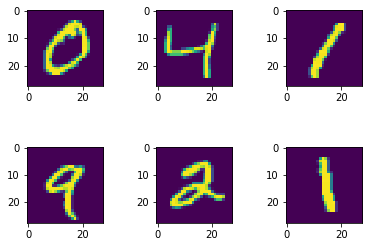

In [21]:
#display some data ferom the dataset
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.7)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.imshow(x_train[i])
    #plt.title(EMOTION_DICT[emotion['emotion'][i]])

In [22]:
#reshaping the data to enter it in  model
x_train=x_train.reshape(x_train.shape[0],image_vector)
x_test=x_test.reshape(x_test.shape[0],image_vector)

#encoding the y data to enter it in model ()
y_train=keras.utils.to_categorical(y_train,num_of_classes)
y_test=keras.utils.to_categorical(y_test,num_of_classes)


In [23]:
# build the network
# create model
model = Sequential()

model.add(Dense(int(image_vector/3),
                input_shape=x_train[0].shape,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dense(int(image_vector/4),kernel_initializer='normal',activation='sigmoid'))

model.add(Dense(num_of_classes,kernel_initializer='normal',activation='softmax'))

# Compile model
sgd = optimizers.SGD(lr=0.07)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 261)               204885    
_________________________________________________________________
dense_11 (Dense)             (None, 196)               51352     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1970      
Total params: 258,207
Trainable params: 258,207
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
history=model.fit(x_train, y_train,
                  validation_data=(x_test, y_test), 
                  validation_split=0.1,
                  epochs=3, 
                  batch_size=32,
                  verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 12s 195us/step - loss: 0.4204 - acc: 0.8779 - val_loss: 0.2684 - val_acc: 0.9186
Epoch 2/3
60000/60000 [==============================] - 11s 181us/step - loss: 0.2781 - acc: 0.9198 - val_loss: 0.2713 - val_acc: 0.9205
Epoch 3/3
60000/60000 [==============================] - 11s 183us/step - loss: 0.3022 - acc: 0.9127 - val_loss: 0.3165 - val_acc: 0.9095


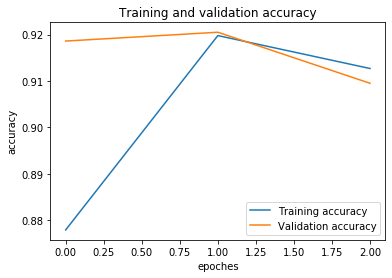

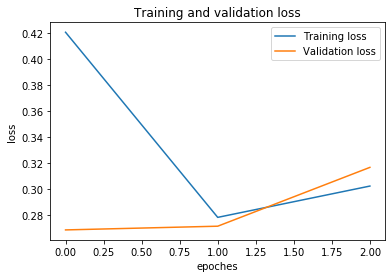

In [25]:
# Visualize loss and accuracy
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend()

In [26]:
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.3165193165540695
Test accuracy: 0.9095
